In [1]:
import pandas as pd

In [3]:
trxn = pd.read_csv('Retail_Data_Transactions.csv')

In [5]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [7]:
response = pd.read_csv('Retail_Data_Response.csv')

In [9]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [11]:
df = trxn.merge(response, on = 'customer_id', how = 'left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
#features

df.dtypes
df.shape
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [15]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [17]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [31]:
df = df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [19]:
#change data types
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response'] = df['response'].astype('int64')

C:\Users\gwtus\AppData\Local\Temp\ipykernel_13524\4178526655.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [43]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [ ]:
set(df['response'])

In [ ]:
df.dtypes

In [23]:
#check for outliers
#z-zcore

from scipy import stats
import numpy as np

#calculate z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold = 3

outliers = z_scores>threshold
print(df[outliers])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [25]:
from scipy import stats
import numpy as np

#calculate z score
z_scores = np.abs(stats.zscore(df['response']))

#set a threshold

threshold = 3

outliers = z_scores>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


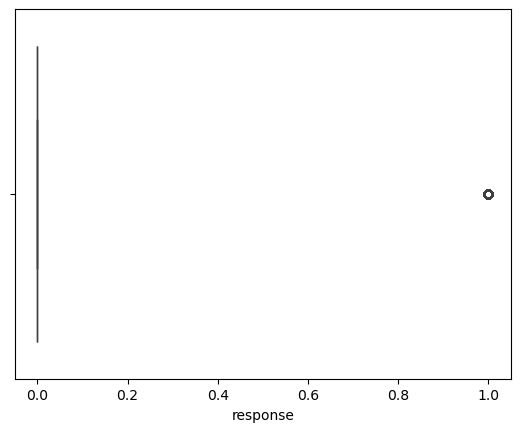

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = df['response'])
plt.show()

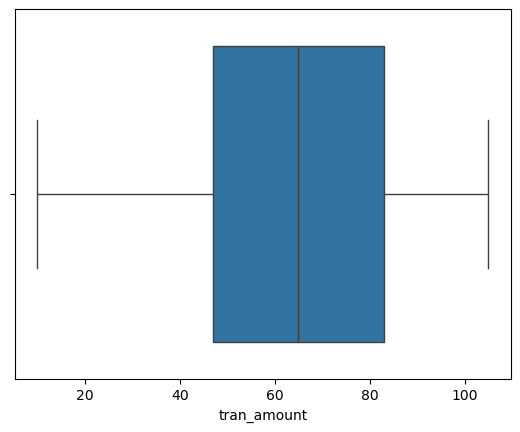

In [57]:
sns.boxplot(x = df['tran_amount'])
plt.show()

In [29]:
#creating new columns

df['month'] = df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1.0,2
1,CS4768,2015-03-15,39,1.0,3
2,CS2122,2013-02-26,52,0.0,2
3,CS1217,2011-11-16,99,0.0,11
4,CS1850,2013-11-20,78,0.0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,6
124996,CS7232,2014-08-19,38,0.0,8
124997,CS8731,2014-11-28,42,0.0,11
124998,CS8133,2013-12-14,13,0.0,12


In [31]:
#which 3 months have had the highest transaction amounts?

monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales

,month,tran_amount
0,8,726921
1,10,725320
2,1,724107
3,7,717223
4,12,709964
5,11,698273
6,6,697014
7,9,694433
8,2,645154
9,3,636577


In [33]:
monthly_sales.head(3)

,month,tran_amount
0,8,726921
1,10,725320
2,1,724107


In [35]:
#customers having highest number of orders

customer_counts = df['customer_id'].value_counts().reset_index()

#sort
top_5_cus = customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS1215,35
4,CS5109,35


<Axes: xlabel='customer_id', ylabel='count'>

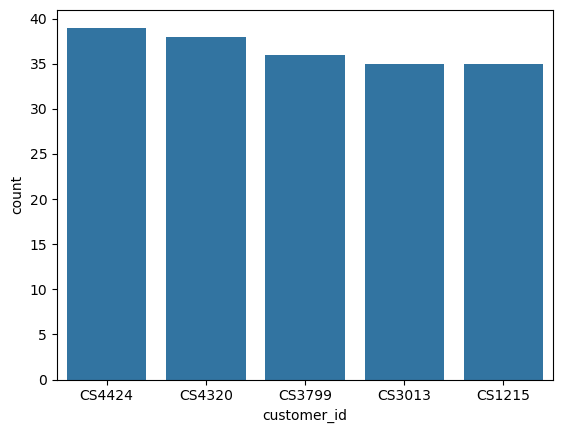

In [73]:
sns.barplot(x= 'customer_id', y='count', data=top_5_cus )

In [37]:
#customers having highest value of orders

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales
#sort
top_5_sales = customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

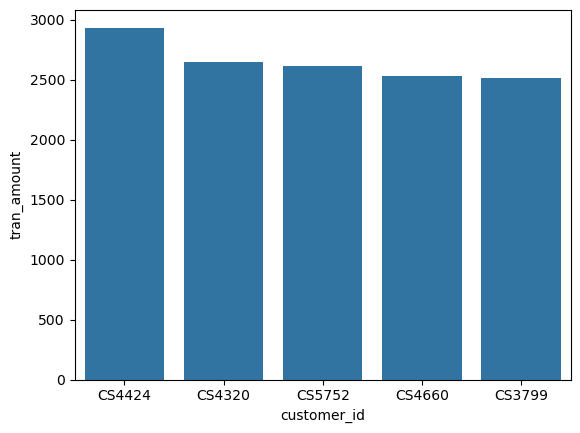

In [82]:
sns.barplot(x= 'customer_id', y='tran_amount', data=top_5_sales )

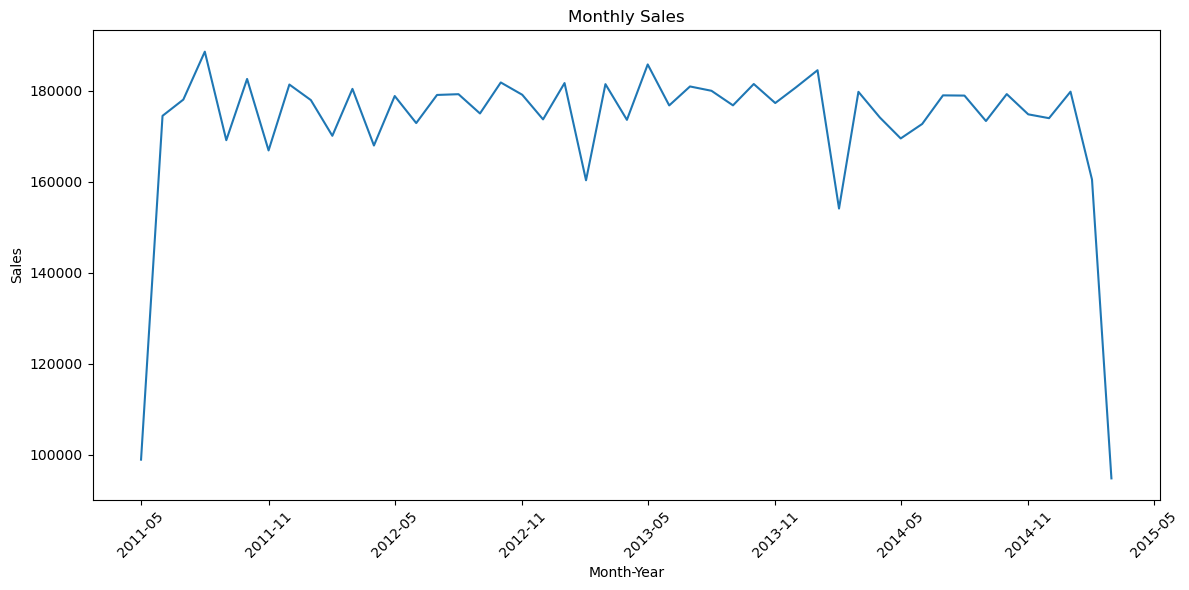

In [45]:
#Advanced analytics
#Time series analysis
import matplotlib.dates as mdates

df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize = (12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cohort Segmentation


In [54]:
# Recency
recency = df.groupby('customer_id')['trans_date'].max()

#frequency
frequency = df.groupby('customer_id')['trans_date'].count()

#Monetory
monetary = df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm = pd.DataFrame({'recency':recency, 'frequency':frequency, 'monetary':monetary})


In [56]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [58]:
#customer segmentation
def segement_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012 and (10<row['frequency']<15) and (500<=row['monetary']<=1000)):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segement_customer, axis=1)

    

In [60]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


### Churn Analaysis

<Axes: xlabel='response'>

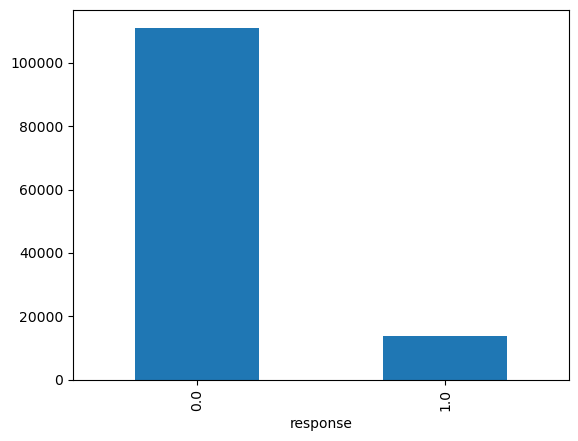

In [65]:
#count the number of churned and active customers
churn_counts = df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')


### Analysing TOP customers


<Axes: xlabel='month_year'>

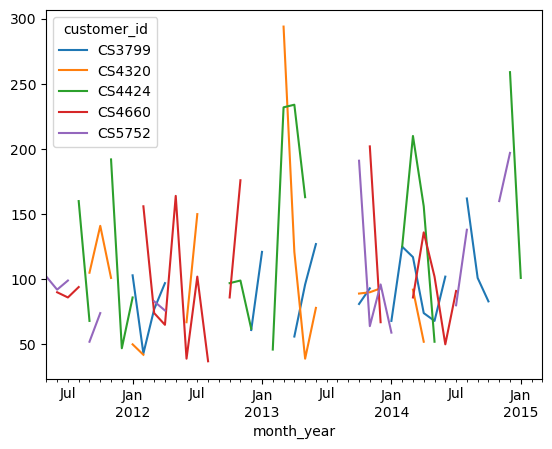

In [68]:
top_5_cus = monetary.sort_values(ascending = False).head(5).index

top_customer_df = df[df['customer_id'].isin(top_5_cus)]

top_customer_sales = top_customer_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind = 'line')

In [70]:
df.to_csv('MainData.csv')

In [72]:
rfm.to_csv('AddAnyls.csv')